# 情感分类 & 建立神经网络时，应如何“搭建问题框架”
讲师：Andrew Trask

- **推特**: @iamtrask
- **博客**: http://iamtrask.github.io

### 你应该掌握的背景知识

- 神经网络、前向传播、反向传播
- 随机梯度下降
- 均方误差
- 训练集/测试集的切分

### 如有需要，请
- 重看优达学城以前的课程
- 充分利用课程的推荐阅读材料 - [《深度学习详解》](https://www.manning.com/books/grokking-deep-learning) (请进入课室查看优惠码)
- @iamtrask 给我发推特


### 教学大纲：

- 简介： “搭建问题框架”的重要性（本课）

- [管护数据集](#lesson_1)
- [提出“预测理论”](#lesson_2)
- [**项目 1**：快速验证理论](#project_1)


- [将文本转换成数字](#lesson_3)
- [**项目 2**：创建输入/输出数据](#project_2)


- 融会贯通，创建神经网络 (仅视频 - 无 notebook 内容)
- [**项目 3**：创建神经网络](#project_3)


- [理解神经噪声](#lesson_4)
- [**项目 4**：通过降噪来提高网络学习速度](#project_4)


- [分析网络的不足之处](#lesson_5)
- [**项目 5**：提高网络训练和运行的速度](#project_5)


- [进一步降噪](#lesson_6)
- [**项目 6**：有策略地删减词汇，进行降噪](#project_6)


- [分析：权重怎么了？](#lesson_7)

# 课程：管护数据集<a id='lesson_1'></a>
从此处开始到项目 1 为止的代码框包含了 Andrew 在迷你项目 1 教学视频之前用过的代码，因此你无需手动输入，即可跟着视频运行代码。

In [6]:
def pretty_print_review_and_label(i):
    print(labels[i] + "\t:\t" + reviews[i][:80] + "...")

g = open('reviews.txt','r') # What we know!
reviews = list(map(lambda x:x[:-1],g.readlines()))
g.close()

In [7]:
g = open('labels.txt','r') # What we WANT to know!
labels = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

**注:** 对于正在使用的 `reviews.txt` 中的数据，我们已进行了一些预处理，现在数据只包含小写字符，但如果我们现在使用的是原始数据，因为不知道数据是否全为小写，所以此时应添加一步操作，进行大小写转换。处理同一个单词的不同形态时，如 `The`、 `the` 和 `THE`，也要进行同样的转换。

In [3]:
len(reviews)

25000

In [4]:
reviews[0]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   '

In [5]:
labels[0]

'POSITIVE'

# 课程: 提出预测理论<a id='lesson_2'></a>

In [6]:
print("labels.txt \t : \t reviews.txt\n")
pretty_print_review_and_label(2137)
pretty_print_review_and_label(12816)
pretty_print_review_and_label(6267)
pretty_print_review_and_label(21934)
pretty_print_review_and_label(5297)
pretty_print_review_and_label(4998)

labels.txt 	 : 	 reviews.txt

NEGATIVE	:	this movie is terrible but it has some good effects .  ...
POSITIVE	:	adrian pasdar is excellent is this film . he makes a fascinating woman .  ...
NEGATIVE	:	comment this movie is impossible . is terrible  very improbable  bad interpretat...
POSITIVE	:	excellent episode movie ala pulp fiction .  days   suicides . it doesnt get more...
NEGATIVE	:	if you haven  t seen this  it  s terrible . it is pure trash . i saw this about ...
POSITIVE	:	this schiffer guy is a real genius  the movie is of excellent quality and both e...


# 项目 1: 快速验证理论<a id='project_1'></a>

实现这些项目的方法有很多，但为了让你的代码接近 Andrew 在解决方案里使用的代码，我们在这个 notebook 里给出了一些提示和代码的开头部分。

请在本练习中善加利用 [计数器](https://docs.python.org/2/library/collections.html#collections.Counter) 类和 [numpy](https://docs.scipy.org/doc/numpy/reference/) 库。

In [8]:
from collections import Counter
import numpy as np

我们要创建三个 `计数器` 对象，其中一个为正面评价的单词计数，一个为负面评价的单词计数，还有一个为所有单词计数。

In [9]:
# Create three Counter objects to store positive, negative and total counts
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

**待办：** 遍历所有评价，每遇到一个出现在正面评价里的单词，就为该单词的正面评价计数器和总计数器增量；同理，每遇到一个出现在负面评价里的单词，就为该单词的负面评价计数器和总计数器增量。

**注:** 在这些项目中，请用 `split(' ')` 来将一段文本（比如一段评价）分割成独立的单词，如果你用的是 `split()`，那结果会和视频以及解决方案里的有所出入。

In [10]:
# TODO: Loop over all the words in all the reviews and increment the counts in the appropriate counter objects
#方法一
for i in range(len(reviews)):
    i_list = reviews[i].split(' ')
    for j in i_list:
        if labels[i] == 'POSITIVE':
            positive_counts[j] += 1
        else:
            negative_counts[j] += 1
        total_counts[j] += 1
        

In [21]:
#方法二
for i in range(len(reviews)):
    if (labels[i] == 'POSITIVE'):
        for word in reviews[i].split(' '):
            positive_counts[word] += 1
            total_counts[word] += 1
    else:
        for word in reviews[i].split(' '):
            negative_counts[word] += 1
            total_counts[word] += 1

运行下方两个代码框，分别列出出现在正面评价和负面评价中的单词，并按出现频率由高到低排序。

In [22]:
# Examine the counts of the most common words in positive reviews
positive_counts.most_common(10)

[('', 550468),
 ('the', 173324),
 ('.', 159654),
 ('and', 89722),
 ('a', 83688),
 ('of', 76855),
 ('to', 66746),
 ('is', 57245),
 ('in', 50215),
 ('br', 49235)]

In [23]:
# Examine the counts of the most common words in negative reviews
negative_counts.most_common(10)

[('', 561462),
 ('.', 167538),
 ('the', 163389),
 ('a', 79321),
 ('and', 74385),
 ('of', 69009),
 ('to', 68974),
 ('br', 52637),
 ('is', 50083),
 ('it', 48327)]

你可以发现，如 “the” 等常见单词在正面评价和负面评价中出现的频率都很高，因此，你要找的其实不是正面评价或负面评价中最常见的单词，而是在正面评价里的出现频率比在负面评价里的高的单词，以及在负面评价里的出现频率比在正面评价里的高的单词，为此，你需要计算单词在正面评价与负面评价中出现的次数的 **比值**。  

**待办：** 查看所有你见过的单词，计算各单词在正面评价和负面评价中出现的次数的比值，并将这些比值存入 `pos_neg_ratios`。
>提示：计算给定单词的正面评价/负面评价比，可使用 `positive_counts[word] / float(negative_counts[word]+1)`。注意，分母要 `+1`——这样如果遇到只在正面评价中出现的单词，分母不会变为 0。

**通过使用单词的评价比，可以有效的排除掉例如‘the’这样不能够决定情绪分类的常用单词。 **  

> * 当单词的正面评价/负面评价比等于1时：说明该词在正面和负面中出现的次数差不多，可以认为是常用日常常用词，不能够决定情绪分类。
> * 当单词的正面评价/负面评价比大于1时：说明该词在正面评价中出现的次数比负面出现的次数多，可以认为是能决定正面情绪的词。


In [11]:
# Create Counter object to store positive/negative ratios
pos_neg_ratios = Counter()

# TODO: Calculate the ratios of positive and negative uses of the most common words
#       Consider words to be "common" if they've been used at least 100 times 
for i in range(len(reviews)):
    i_list = reviews[i].split(' ')
    for word in i_list:
        pos_neg_ratios[word] = positive_counts[word] / float(negative_counts[word]+1)

查看若干单词的比值计算结果：

In [54]:
print("Pos-to-neg ratio for 'the' = {}".format(pos_neg_ratios["the"]))
print("Pos-to-neg ratio for 'amazing' = {}".format(pos_neg_ratios["amazing"]))
print("Pos-to-neg ratio for 'terrible' = {}".format(pos_neg_ratios["terrible"]))

Pos-to-neg ratio for 'the' = 0
Pos-to-neg ratio for 'amazing' = 0
Pos-to-neg ratio for 'terrible' = 0


仔细观察刚才算出的比值，我们可以发现：

* 那些你觉得在正面评价里会更常见的单词——如 "amazing" ——比值大于 1。单词在正面评价中出现得越频繁，其正面评价/负面评价比就越大于 1。
* 那些你觉得在负面评价里会更常见的单词——如 "terrible" ——比值小于 1。单词在负面评价里出现得越频繁，其正面评价/负面评价比就越接近 0。
* 中性词不含任何感情色彩，毕竟它们在各类评论中都有出现——如 "the" —— 比值非常接近 1。 一个完全中性的词，也即在正面评价和负面评价中出现次数完全相同的词，比值会无限接近于 1。虽然因为上文的建议，分母进行了 `+1` 处理，使得单词稍稍偏向负面，但因为这个偏置很小，而我们稍后会忽略太接近于中性的词，所以影响不大。

好了，虽然比值能告诉我们哪个单词在正面评价/负面评价中出现得更频繁，但要处理我们算出的这些具体数值还是有点麻烦。褒义色彩十分浓厚的词，如 "amazing"，其比值大于4，而贬义色彩十分浓厚的词，如 "terrible"，其比值则在 0.18 左右，要比较这些数值并不容易，原因如下：

* 现在我们视 1 为中性，但因为褒义色彩十分浓厚的词的正面评价/负面评价比的绝对值比贬义色彩十分浓厚的词的比的绝对值大，所以我们无法直接比较这两者，也就无从确定这两个单词所包含的褒义/贬义程度是否相同，因此，我们应以中性值为所有数值的中心，这样一来，就可以用单词的正面评价/负面评价比与中性值之差的绝对值来衡量单词蕴含了多少感情色彩（褒义/贬义）了。
* 在比较绝对值时，以 0 为中心要比以 1 为中心容易。

要解决上述问题，我们要对所有比值进行对数变换，从而得出新值。

**待办：** 遍历你计算出来的所有比值，将其转化为对数。(也就是说，使用 `np.log(ratio)`)

到最后，褒义色彩极为浓厚的单词的正面评价/负面评价比会与贬义色彩极为浓厚的单词的比的大小相似，但符号相反。

In [15]:
#实例解决方法
pos_neg_ratios = Counter()

#计算正面评价和负面评价比值
for term, cnt in list(total_counts.most_common()):
    #筛选出对情绪预测有真正作用的词。
    if(cnt > 100):
        pos_neg_ratio = positive_counts[term] / float(negative_counts[term] + 10)
        pos_neg_ratios[term] = pos_neg_ratio

#将比值转换为对数
for word, ratio in pos_neg_ratios.most_common():
    if(ratio > 1):
        pos_neg_ratios[word] = np.log(ratio)
    else:
        pos_neg_ratios[word] = -np.log(ratio + 0.01)

In [16]:
# TODO: Convert ratios to logs、
for word in pos_neg_ratios:
    pos_neg_ratios[word] = np.log(pos_neg_ratios[word])
# pos_neg_ratios

c:\users\wyf35\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


查看之前那些单词的新比值计算结果：

In [17]:
print("Pos-to-neg ratio for 'the' = {}".format(pos_neg_ratios["the"]))
print("Pos-to-neg ratio for 'amazing' = {}".format(pos_neg_ratios["amazing"]))
print("Pos-to-neg ratio for 'terrible' = {}".format(pos_neg_ratios["terrible"]))

Pos-to-neg ratio for 'the' = -2.8307669205822776
Pos-to-neg ratio for 'amazing' = 0.30625861467911936
Pos-to-neg ratio for 'terrible' = 0.519021639820512


如果一切顺利，现在中性词的比值应该接近于 0。此时，"the" 接近 0 但仍是个十分小的正数，所以这个单词可能在正面评价中出现的次数比在负面评价中的多，但我们来看 "amazing"，其比值大于 `1`，意味着这是个明确的褒义词，而 "terrible" 的比值与其相似，但符号不同，也就是小于 `-1`，由此我们可以清楚地得知这两个单词具有特定浓度且相反的感情色彩。

现在，运行下方代码框，观察更多比值。

第一个代码框会列出所有单词，并按单词与正面评价的相关性排序。（你的 notebook 很可能会对输出进行删减，所以你不会真的看到列表里的*所有*单词。）

第二个代码框会列出 30 个与负面评价关系最紧密的单词——首先代码会反转第一张列表的顺序，然后查找前 30 个单词。（如果想让第二个代码框列出所有单词并按单词与负面评价的相关性排序，你可以写 `reversed(pos_neg_ratios.most_common())`。）

你接下来看到的数值会和我们之前看到的类似——中性词的比值接近 `0`；单词在正面评价里出现得越频繁，其比值就越接近甚至大于 `1`；单词在负面评价里出现得越频繁，其比值就越接近甚至小于 `-1`。这就是我们用对数而非原始比值的原因所在。

In [25]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()

[('boll', 4.102218618653007),
 ('uwe', 3.962842253824359),
 ('seagal', 3.361264671326784),
 ('unwatchable', 3.0922821595296623),
 ('stinker', 3.0568199655338293),
 ('incoherent', 2.8193384163933115),
 ('mst', 2.818025399614709),
 ('unfunny', 2.5851520647790562),
 ('waste', 2.496553155174324),
 ('blah', 2.4899191916115444),
 ('horrid', 2.4427317247372877),
 ('edie', 2.388762789235098),
 ('paulie', 2.372789351667294),
 ('pointless', 2.3622233593137767),
 ('atrocious', 2.3622233593137767),
 ('prom', 2.333492630457122),
 ('drivel', 2.315572288520857),
 ('redeeming', 2.2935352574741277),
 ('lousy', 2.2515299221937615),
 ('victoria', 2.211017899468555),
 ('worst', 2.196381559281837),
 ('laughable', 2.1935258423414696),
 ('wasting', 2.1764082652091936),
 ('remotely', 2.158003864182938),
 ('poorly', 2.1452938714596423),
 ('awful', 2.1437775732155773),
 ('felix', 2.1231166051824975),
 ('matthau', 2.1135745480492947),
 ('existent', 2.058486176503848),
 ('miserably', 1.9947297254219856),
 ('bored

In [26]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common()))[0:30]

# Note：: Above is the code Andrew uses in his solution video, 
#       so we've included it here to avoid confusion.
#       If you explore the documentation for the Counter class, 
#       you will see you could also find the 30 least common
#       words like this: pos_neg_ratios.most_common()[:-31:-1]

[('subtlety', -0.009950330853168092),
 ('crush', -0.009950330853168092),
 ('dutch', -0.009950330853168092),
 ('surviving', -0.009950330853168092),
 ('primarily', -0.009950330853168092),
 ('punk', -0.009950330853168092),
 ('passes', -0.009950330853168092),
 ('yellow', -0.009950330853168092),
 ('scheme', -0.009950330853168092),
 ('groups', -0.009950330853168092),
 ('escaped', -0.009950330853168092),
 ('proceedings', -0.009950330853168092),
 ('swedish', -0.009950330853168092),
 ('birds', -0.009950330853168092),
 ('imagined', -0.009950330853168092),
 ('craven', -0.009950330853168092),
 ('rid', -0.009950330853168092),
 ('watches', -0.009950330853168092),
 ('push', -0.009950330853168092),
 ('menacing', -0.009950330853168092),
 ('row', -0.009950330853168092),
 ('infamous', -0.009950330853168092),
 ('suffered', -0.009950330853168092),
 ('suspects', -0.009950330853168092),
 ('mass', -0.009950330853168092),
 ('raise', -0.009950330853168092),
 ('underground', -0.009950330853168092),
 ('closing', 

# 项目 1 到此结束
## 请进入下一个视频，观看  Andrew 的解决方案，然后继续学习下一课。

# 将文本转换成数字<a id='lesson_3'></a>
此代码框包含 Andrew 在下一个视频中使用的代码，因此你无需手动输入，即可跟着视频运行代码。

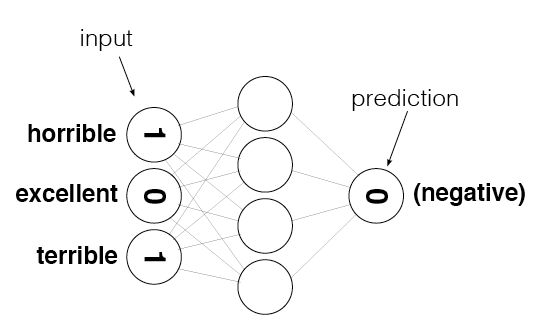

In [18]:
from IPython.display import Image

review = "This was a horrible, terrible movie."

Image(filename='sentiment_network.png')

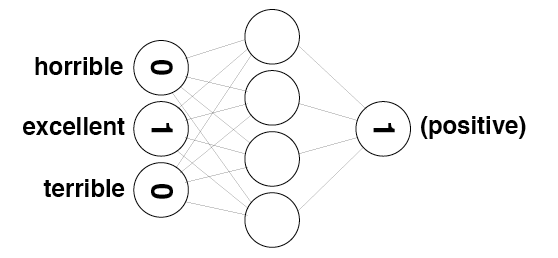

In [19]:
review = "The movie was excellent"

Image(filename='sentiment_network_pos.png')

# 项目 2：创建输入/输出数据<a id='project_2'></a>

**待办：** 创建一个名为 `vocab` 的[集合](https://docs.python.org/3/tutorial/datastructures.html#sets)，将词汇表的所有单词放入其中。

In [20]:
# TODO: Create set named "vocab" containing all of the words from all of the reviews
vocab = set([word for word in total_counts])
vocab

{'',
 'although',
 'pullout',
 'oddities',
 'therefrom',
 'belly',
 'explodes',
 'saintliness',
 'reverted',
 'wrestled',
 'romany',
 'obtuse',
 'contemplations',
 'ventura',
 'karadzhic',
 'ron',
 'thrusted',
 'sentinels',
 'poalher',
 'tremor',
 'koi',
 'boyens',
 'tased',
 'apollo',
 'stabilize',
 'stewarts',
 'translating',
 'unthinkable',
 'lei',
 'encasing',
 'livelier',
 'brilliancy',
 'mcconnahay',
 'straitjacketed',
 'unmentionable',
 'param',
 'etat',
 'twang',
 'tastes',
 'spiritless',
 'ok',
 'boneheads',
 'stensvold',
 'representing',
 'spouses',
 'boffo',
 'bergmanesque',
 'vacuously',
 'owned',
 'reinas',
 'entombed',
 'nadia',
 'handguns',
 'ontkean',
 'estelle',
 'materializes',
 'jafar',
 'lining',
 'appliances',
 'borstein',
 'swartzenegger',
 'mdchen',
 'dolomites',
 'damages',
 'shipping',
 'heartrending',
 'resistor',
 'ophuls',
 'motorcross',
 'roland',
 'idly',
 'imaginations',
 'chancery',
 'snuggled',
 'who',
 'akhtar',
 'worries',
 'savaging',
 'reiterate',
 

运行下方代码框，查看词汇表大小，如果一切顺利，代码输出的结果将是 **74074**

In [21]:
vocab_size = len(vocab)
print(vocab_size)

74074


观察下图，图中包括了你将在这个 notebook 里创建的神经网络的各层，其中，`layer_0` 是输入层，`layer_1`是隐藏层，`layer_2` 是输出层。

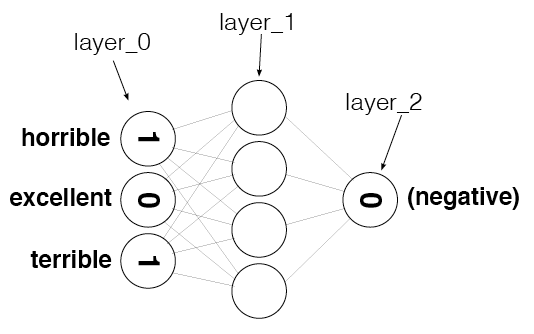

In [22]:
from IPython.display import Image
Image(filename='sentiment_network_2.png')

![png](output_38_0.png)



**待办：** 创建一个名为 `layer_0` 的 numpy 数组，将其所有元素初始化为 0。此处函数 [zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html) 可派上大用场。请确保你创建的 `layer_0` 是个二维矩阵，其行数为 1，列数为 `vocab_size` 的值。

In [23]:
# TODO: Create layer_0 matrix with dimensions 1 by vocab_size, initially filled with zeros
layer_0 = np.zeros((1,len(vocab)))
layer_0

array([[0., 0., 0., ..., 0., 0., 0.]])

运行下方代码框，结果应为 `(1, 74074)`

In [17]:
layer_0.shape

(1, 74074)

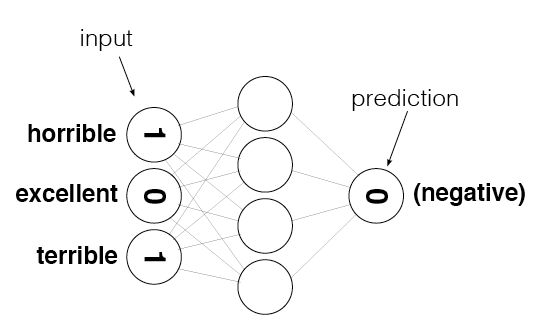

In [24]:
from IPython.display import Image
Image(filename='sentiment_network.png')

`layer_0` 包含了词汇表里的所有单词，一项代表词汇表里的一个词，如上图所示。为了确保我们知道每个单词的索引，请运行下方代码框，创建查找表并将各单词的索引存储其中。

In [25]:
# Create a dictionary of words in the vocabulary mapped to index positions
# (to be used in layer_0)
#创建一个单词索引表
word2index = {}
for i,word in enumerate(vocab):
    word2index[word] = i
    
# display the map of words to indices
word2index

{'': 0,
 'although': 1,
 'pullout': 2,
 'oddities': 3,
 'therefrom': 4,
 'belly': 5,
 'explodes': 6,
 'saintliness': 7,
 'reverted': 8,
 'wrestled': 9,
 'romany': 10,
 'obtuse': 11,
 'contemplations': 12,
 'ventura': 13,
 'karadzhic': 14,
 'ron': 15,
 'thrusted': 16,
 'sentinels': 17,
 'poalher': 18,
 'tremor': 19,
 'koi': 20,
 'boyens': 21,
 'tased': 22,
 'apollo': 23,
 'stabilize': 24,
 'stewarts': 25,
 'translating': 26,
 'unthinkable': 27,
 'lei': 28,
 'encasing': 29,
 'livelier': 30,
 'brilliancy': 31,
 'mcconnahay': 32,
 'straitjacketed': 33,
 'unmentionable': 34,
 'param': 35,
 'etat': 36,
 'twang': 37,
 'tastes': 38,
 'spiritless': 39,
 'ok': 40,
 'boneheads': 41,
 'stensvold': 42,
 'representing': 43,
 'spouses': 44,
 'boffo': 45,
 'bergmanesque': 46,
 'vacuously': 47,
 'owned': 48,
 'reinas': 49,
 'entombed': 50,
 'nadia': 51,
 'handguns': 52,
 'ontkean': 53,
 'estelle': 54,
 'materializes': 55,
 'jafar': 56,
 'lining': 57,
 'appliances': 58,
 'borstein': 59,
 'swartzenegger'

**待办:**  实现函数 `update_input_layer`，使该函数统计每个单词出现在给定评论里的次数，并将统计结果存入 `layer_0` 相应的索引下。

In [26]:
def update_input_layer(review):
    """ Modify the global layer_0 to represent the vector form of review.
    The element at a given index of layer_0 should represent
    how many times the given word occurs in the review.
    修改全局layer_0以表示评论的矢量形式。     
    给定索引的layer_0元素应表示     
    给定单词在评论中出现了多少次
    Args:
        review(string) - the string of the review
    Returns:
        None
    """
    global layer_0
    # clear out previous state by resetting the layer to be all 0s
    layer_0 *= 0
    
    # TODO: count how many times each word is used in the given review and store the results in layer_0 
    for word in review.split(' '):
        word_index = word2index[word]
#         print(word_index)
#         layer_0[:,word_index] += 1
        layer_0[0,word_index] += 1

运行下方代码框，测试用第一条评论更新输入层的效果。此处所赋索引可能与解决方案中的不同，但你应该也能看到 `layer_0` 中出现了一些非零数值。

In [27]:
update_input_layer(reviews[0])
layer_0

array([[18.,  0.,  0., ...,  0.,  0.,  0.]])

**待办：** 实现函数 `get_target_for_labels`，使其根据给定标签是 `NEGATIVE` （负面）还是 `POSITIVE` （正面）返回 `0` 或 `1`。

In [28]:
def get_target_for_label(label):
    """Convert a label to `0` or `1`.
    Args:
        label(string) - Either "POSITIVE" or "NEGATIVE".
    Returns:
        `0` or `1`.
    """
    # TODO: Your code here
    if (label == 'POSITIVE'):
        return 1
    else:
        return 0

运行下方两个代码框，结果应分别输出 `'POSITIVE'` 和 `1`。

In [29]:
labels[0]

'POSITIVE'

In [30]:
get_target_for_label(labels[0])

1

运行下方两个代码框，结果应分别输出 `'NEGATIVE'` 和 `0`。

In [31]:
labels[1]

'NEGATIVE'

In [32]:
get_target_for_label(labels[1])

0

 **高效率：**
 * 当在创建类似于`layer_0`这样的变量时，尽量不要为数据分配全新的向量。
 * 没有预生成完整的数据集。


# 项目 2 到此结束。
## 请进入下一个视频，观看 Andrew 的解决方案，然后继续学习下一课。

# 项目 3：创建神经网络<a id='project_3'></a>

**待办：** 此处使用了类 `SentimentNetork` 的框架，请实现代码里所有标有 `TODO` 的待办事项，具体操作内容如下：
- 创建一个基本的神经网络，就像你在之前的课程和项目 1 中看到的一样，该网络应具备一个输入层、一个隐藏层和一个输出层。
- 请**不要**在隐藏层中添加非线性元素，也就是说，请不要用激活函数计算隐藏层的输出。
- 利用本 notebook 前面的代码来创建训练数据（请见代码中的 `TODO` 事项）
- 实现函数 `pre_process_data`，为训练数据生成函数创建词汇表
- 确保 `train` 会对整个语料库进行训练

### 如有需要，请
- 重看以前的优达学城课程
- 查阅 [《深度学习详解》](https://www.manning.com/books/grokking-deep-learning)的第 3-5 章 - (请进入课室查看优惠码)

In [33]:
import time
import sys
import numpy as np

# Encapsulate our neural network in a class
class SentimentNetwork:
    def __init__(self, reviews, labels, hidden_nodes = 10, learning_rate = 0.1):
        """Create a SentimenNetwork with the given settings
        Args:
            reviews(list) - List of reviews used for training
            labels(list) - List of POSITIVE/NEGATIVE labels associated with the given reviews
            hidden_nodes(int) - Number of nodes to create in the hidden layer
            learning_rate(float) - Learning rate to use while training
        
        """
        # Assign a seed to our random number generator to ensure we get
        # reproducable results during development 
        np.random.seed(1)

        # process the reviews and their associated labels so that everything
        # is ready for training
        self.pre_process_data(reviews, labels)
        
        # Build the network to have the number of hidden nodes and the learning rate that
        # were passed into this initializer. Make the same number of input nodes as
        # there are vocabulary words and create a single output node.
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)

    def pre_process_data(self, reviews, labels):
        
        review_vocab = set()
        # TODO: populate review_vocab with all of the words in the given reviews 
        #       Remember to split reviews into individual words 
        #       using "split(' ')" instead of "split()".
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)
        # Convert the vocabulary set to a list so we can access words via indices 
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        # TODO: populate label_vocab with all of the words in the given labels.
        #       There is no need to split the labels because each one is a single word.
        for label in labels:
            label_vocab.add(label)
        # Convert the label vocabulary set to a list so we can access labels via indices
        self.label_vocab = list(label_vocab)
        
        # Store the sizes of the review and label vocabularies.
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        # Create a dictionary of words in the vocabulary mapped to index positions
        self.word2index = {}
        # TODO: populate self.word2index with indices for all the words in self.review_vocab
        #       like you saw earlier in the notebook 

        for i,word in enumerate(self.review_vocab):
            self.word2index[word] = i
            
        # Create a dictionary of labels mapped to index positions 
        self.label2index = {}
        # TODO: do the same thing you did for self.word2index and self.review_vocab, 
        #       but for self.label2index and self.label_vocab instead 
        for j,label in enumerate(self.label_vocab):
            self.label2index[label] = j
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Store the number of nodes in input, hidden, and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Store the learning rate
        self.learning_rate = learning_rate

        # Initialize weights
        
        # TODO: initialize self.weights_0_1 as a matrix of zeros. These are the weights between
        #       the input layer and the hidden layer.
        self.weights_0_1 = np.zeros((self.input_nodes, self.hidden_nodes))
        
        # TODO: initialize self.weights_1_2 as a matrix of random values. 
        #       These are the weights between the hidden layer and the output layer.
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        # TODO: Create the input layer, a two-dimensional matrix with shape 
        #       1 x input_nodes, with all values initialized to zero 1 x input_nodes，
        self.layer_0 = np.zeros((1,input_nodes))
    
        
    def update_input_layer(self,review):
        # TODO: You can copy most of the code you wrote for update_input_layer 
        #       earlier in this notebook. 
        #
        #       However, MAKE SURE YOU CHANGE ALL VARIABLES TO REFERENCE
        #       THE VERSIONS STORED IN THIS OBJECT, NOT THE GLOBAL OBJECTS.
        #       For example, replace "layer_0 *= 0" with "self.layer_0 *= 0"

        # clear out previous state by resetting the layer to be all 0s
        self.layer_0 *= 0

        # TODO: count how many times each word is used in the given review and store the results in layer_0 
        for word in review.split(' '):

            if(word in self.word2index.keys()):
                self.layer_0[0][self.word2index[word]] += 1
                
    def get_target_for_label(self,label):
        # TODO: Copy the code you wrote for get_target_for_label 
        #       earlier in this notebook. 
        if (label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def sigmoid(self,x):
        # TODO: Return the result of calculating the sigmoid activation function
        #       shown in the lectures 
        return 1 / (1+np.exp(-x))
    
    def sigmoid_output_2_derivative(self,output):
        # TODO: Return the derivative of the sigmoid activation function, 
        #       where "output" is the original output from the sigmoid fucntion 
        return output * (1-output)

    def train(self, training_reviews, training_labels):
        
        # make sure out we have a matching number of reviews and labels
        assert(len(training_reviews) == len(training_labels))
        
        # Keep track of correct predictions to display accuracy during training
        correct_so_far = 0
        
        # Remember when we started for printing time statistics
        start = time.time()

        # loop through all the given reviews and run a forward and backward pass,
        # updating weights for every item
        for i in range(len(training_reviews)):
            
            # TODO: Get the next review and its correct label
            review = training_reviews[i]
            label = training_labels[i]
            # TODO: Implement the forward pass through the network. 
            #       That means use the given review to update the input layer, 
            #       then calculate values for the hidden layer,
            #       and finally calculate the output layer.
            # 
            #       Do not use an activation function for the hidden layer,
            #       but use the sigmoid activation function for the output layer.
            #input layer
            self.update_input_layer(review)
            
            #hidden layer 输出
            layer_1 = self.layer_0.dot(self.weights_0_1)
            
            #output layer 输出
            layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
            # TODO: Implement the back propagation pass here. 
            #       That means calculate the error for the forward pass's prediction
            #       and update the weights in the network according to their
            #       contributions toward the error, as calculated via the
            #       gradient descent and back propagation algorithms you 
            #       learned in class.
            #  Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # Backpropagated error
            # 由于此处是线性的，所以不用进行斜率调整
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # Update the weights
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta) * self.learning_rate # update input-to-hidden weights with gradient descent step

            # TODO: Keep track of correct predictions. To determine if the prediction was
            #       correct, check that the absolute value of the output error 
            #       is less than 0.5. If so, add one to the correct_so_far count.
            # Keep track of correct predictions.
            if(layer_2 >= 0.5 and label == 'POSITIVE'):
                correct_so_far += 1
            elif(layer_2 < 0.5 and label == 'NEGATIVE'):
                correct_so_far += 1
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the training process. 

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) \
                             + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
    
    def test(self, testing_reviews, testing_labels):
        """
        Attempts to predict the labels for the given testing_reviews,
        and uses the test_labels to calculate the accuracy of those predictions.
        """
        
        # keep track of how many correct predictions we make
        correct = 0

        # we'll time how many predictions per second we make
        start = time.time()

        # Loop through each of the given reviews and call run to predict
        # its label. 
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the prediction process. 

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct) + " #Tested:" + str(i+1) \
                             + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        """
        Returns a POSITIVE or NEGATIVE prediction for the given review.
        """
        # TODO: Run a forward pass through the network, like you did in the
        #       "train" function. That means use the given review to 
        #       update the input layer, then calculate values for the hidden layer,
        #       and finally calculate the output layer.
        #
        #       Note: The review passed into this function for prediction 
        #             might come from anywhere, so you should convert it 
        #             to lower case prior to using it.
        
        # TODO: The output layer should now contain a prediction. 
        #       Return `POSITIVE` for predictions greater-than-or-equal-to `0.5`, 
        #       and `NEGATIVE` otherwise.
        
        # Input Layer
        self.update_input_layer(review.lower())

        # Hidden layer
        layer_1 = self.layer_0.dot(self.weights_0_1)

        # Output layer
        layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
        
        if(layer_2[0] >= 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"

运行下方代码框，创建 `SentimentNetwork`，使之训练除最后一千条评论之外的所有评论（那一千条评论将用于测试），此处我们使用的学习率为 `0.1`。

In [40]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)

运行下方代码框，用最后一千条评论测试网络的性能（即我们不用作训练集的那部分评论）。

**我们还没有训练模型，所以模型只是单纯地在猜测，鉴于可选的值只有两个，因此准确率应该在   50% 左右。**

In [41]:

mlp.test(reviews[-1000:],labels[-1000:])

Progress:13.6% Speed(reviews/sec):745.1 #Correct:69 #Tested:137 Testing Accuracy:50.3%

Progress:27.9% Speed(reviews/sec):754.0 #Correct:140 #Tested:280 Testing Accuracy:50.0%

Progress:41.9% Speed(reviews/sec):750.2 #Correct:210 #Tested:420 Testing Accuracy:50.0%

Progress:54.0% Speed(reviews/sec):725.7 #Correct:271 #Tested:541 Testing Accuracy:50.0%

Progress:67.1% Speed(reviews/sec):719.1 #Correct:336 #Tested:672 Testing Accuracy:50.0%

Progress:80.8% Speed(reviews/sec):721.3 #Correct:405 #Tested:809 Testing Accuracy:50.0%

Progress:93.4% Speed(reviews/sec):714.8 #Correct:468 #Tested:935 Testing Accuracy:50.0%

Progress:99.9% Speed(reviews/sec):713.9 #Correct:500 #Tested:1000 Testing Accuracy:50.0%

运行下方代码框，开始训练网络。训练时，代码会不断输出模型的准确性，以便你观察模型的训练效果。

In [42]:
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:10.4% Speed(reviews/sec):96.67 #Correct:1251 #Trained:2501 Training Accuracy:50.0%
Progress:18.0% Speed(reviews/sec):95.20 #Correct:2166 #Trained:4332 Training Accuracy:50.0%

KeyboardInterrupt: 

很可能训练效果并不好，部分原因可能在于学习率太高了。运行下方代码框，将学习率调小为 `0.01`，重建并重新训练网络。

In [43]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.01)
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:10.4% Speed(reviews/sec):95.18 #Correct:1248 #Trained:2501 Training Accuracy:49.9%
Progress:20.8% Speed(reviews/sec):94.67 #Correct:2498 #Trained:5001 Training Accuracy:49.9%
Progress:30.4% Speed(reviews/sec):85.15 #Correct:3648 #Trained:7300 Training Accuracy:49.9%

KeyboardInterrupt: 

可能效果还是不好。运行下方代码框，再次将学习率调小为 `0.001`，再次重建并重新训练网络。

In [44]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.001)
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:10.4% Speed(reviews/sec):57.87 #Correct:1258 #Trained:2501 Training Accuracy:50.2%
Progress:20.8% Speed(reviews/sec):55.16 #Correct:2522 #Trained:5001 Training Accuracy:50.4%
Progress:31.2% Speed(reviews/sec):55.02 #Correct:3782 #Trained:7501 Training Accuracy:50.4%
Progress:41.6% Speed(reviews/sec):54.78 #Correct:5198 #Trained:10001 Training Accuracy:51.9%
Progress:52.0% Speed(reviews/sec):54.16 #Correct:6694 #Trained:12501 Training Accuracy:53.5%
Progress:62.5% Speed(reviews/sec):54.55 #Correct:8247 #Trained:15001 Training Accuracy:54.9%
Progress:72.9% Speed(reviews/sec):54.83 #Correct:9781 #Trained:17501 Training Accuracy:55.8%
Progress:75.6% Speed(reviews/sec):54.93 #Correct:10212 #Trained:18157 Training Accuracy:56.2%

KeyboardInterrupt: 

当学习率为 `0.001` 时，网络应该终于开始随着训练进行改进了，虽然效果还是不尽人意，但起码说明了这个解决方案是可行的。我们会在下一课进一步改进这个网络。

# 项目 3 到此结束。
## 请进入下一个视频，观看  Andrew 的解决方案，然后继续学习下一课。

# 理解神经噪声<a id='lesson_4'></a>

下方代码框包含了 Andrew 在下一个视频里使用的代码，因此你无须手动输入，只需运行代码框，即可跟着视频运行代码。。

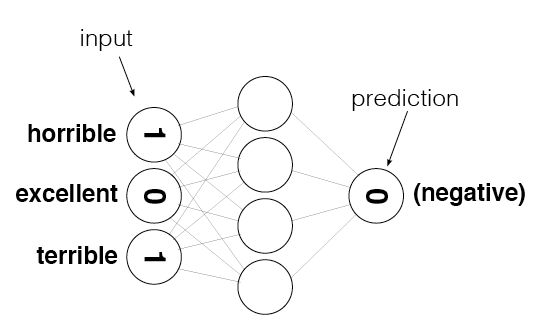

In [34]:
from IPython.display import Image
Image(filename='sentiment_network.png')

In [35]:
def update_input_layer(review):
    
    global layer_0
    
    # clear out previous state, reset the layer to be all 0s
    layer_0 *= 0
    for word in review.split(" "):
        layer_0[0][word2index[word]] += 1

update_input_layer(reviews[0])

In [36]:
layer_0

array([[18.,  0.,  0., ...,  0.,  0.,  0.]])

In [37]:
word2index


{'': 0,
 'although': 1,
 'pullout': 2,
 'oddities': 3,
 'therefrom': 4,
 'belly': 5,
 'explodes': 6,
 'saintliness': 7,
 'reverted': 8,
 'wrestled': 9,
 'romany': 10,
 'obtuse': 11,
 'contemplations': 12,
 'ventura': 13,
 'karadzhic': 14,
 'ron': 15,
 'thrusted': 16,
 'sentinels': 17,
 'poalher': 18,
 'tremor': 19,
 'koi': 20,
 'boyens': 21,
 'tased': 22,
 'apollo': 23,
 'stabilize': 24,
 'stewarts': 25,
 'translating': 26,
 'unthinkable': 27,
 'lei': 28,
 'encasing': 29,
 'livelier': 30,
 'brilliancy': 31,
 'mcconnahay': 32,
 'straitjacketed': 33,
 'unmentionable': 34,
 'param': 35,
 'etat': 36,
 'twang': 37,
 'tastes': 38,
 'spiritless': 39,
 'ok': 40,
 'boneheads': 41,
 'stensvold': 42,
 'representing': 43,
 'spouses': 44,
 'boffo': 45,
 'bergmanesque': 46,
 'vacuously': 47,
 'owned': 48,
 'reinas': 49,
 'entombed': 50,
 'nadia': 51,
 'handguns': 52,
 'ontkean': 53,
 'estelle': 54,
 'materializes': 55,
 'jafar': 56,
 'lining': 57,
 'appliances': 58,
 'borstein': 59,
 'swartzenegger'

In [38]:
review_counter = Counter()

In [39]:
for word in reviews[0].split(" "):
    review_counter[word] += 1

In [40]:
review_counter.most_common()

[('.', 27),
 ('', 18),
 ('the', 9),
 ('to', 6),
 ('high', 5),
 ('i', 5),
 ('bromwell', 4),
 ('is', 4),
 ('a', 4),
 ('teachers', 4),
 ('that', 4),
 ('of', 4),
 ('it', 2),
 ('at', 2),
 ('as', 2),
 ('school', 2),
 ('my', 2),
 ('in', 2),
 ('me', 2),
 ('students', 2),
 ('their', 2),
 ('student', 2),
 ('cartoon', 1),
 ('comedy', 1),
 ('ran', 1),
 ('same', 1),
 ('time', 1),
 ('some', 1),
 ('other', 1),
 ('programs', 1),
 ('about', 1),
 ('life', 1),
 ('such', 1),
 ('years', 1),
 ('teaching', 1),
 ('profession', 1),
 ('lead', 1),
 ('believe', 1),
 ('s', 1),
 ('satire', 1),
 ('much', 1),
 ('closer', 1),
 ('reality', 1),
 ('than', 1),
 ('scramble', 1),
 ('survive', 1),
 ('financially', 1),
 ('insightful', 1),
 ('who', 1),
 ('can', 1),
 ('see', 1),
 ('right', 1),
 ('through', 1),
 ('pathetic', 1),
 ('pomp', 1),
 ('pettiness', 1),
 ('whole', 1),
 ('situation', 1),
 ('all', 1),
 ('remind', 1),
 ('schools', 1),
 ('knew', 1),
 ('and', 1),
 ('when', 1),
 ('saw', 1),
 ('episode', 1),
 ('which', 1),
 ('r

# 项目 4：减小输入数据的噪声<a id='project_4'></a>

**待办：** 学习 Andrew 上一个视频的操作，尝试为输入数据减小噪声，具体操作内容如下：
* 将你之前创建的类 `SentimentNetwork` 复制到下方的代码框中。
* 修改 `update_input_layer`，使其不再统计各单词出现的次数，而只记录单词是否出现过。

In [41]:
# TODO: -Copy the SentimentNetwork class from Projet 3 lesson
#       -Modify it to reduce noise, like in the video 

import time
import sys
import numpy as np

# Encapsulate our neural network in a class
class SentimentNetwork:
    def __init__(self, reviews, labels, hidden_nodes = 10, learning_rate = 0.1):
        """Create a SentimenNetwork with the given settings
        Args:
            reviews(list) - List of reviews used for training
            labels(list) - List of POSITIVE/NEGATIVE labels associated with the given reviews
            hidden_nodes(int) - Number of nodes to create in the hidden layer
            learning_rate(float) - Learning rate to use while training
        
        """
        # Assign a seed to our random number generator to ensure we get
        # reproducable results during development 
        np.random.seed(1)

        # process the reviews and their associated labels so that everything
        # is ready for training
        self.pre_process_data(reviews, labels)
        
        # Build the network to have the number of hidden nodes and the learning rate that
        # were passed into this initializer. Make the same number of input nodes as
        # there are vocabulary words and create a single output node.
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)

    def pre_process_data(self, reviews, labels):
        
        review_vocab = set()
        # TODO: populate review_vocab with all of the words in the given reviews 
        #       Remember to split reviews into individual words 
        #       using "split(' ')" instead of "split()".
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)
        # Convert the vocabulary set to a list so we can access words via indices 
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        # TODO: populate label_vocab with all of the words in the given labels.
        #       There is no need to split the labels because each one is a single word.
        for label in labels:
            label_vocab.add(label)
        # Convert the label vocabulary set to a list so we can access labels via indices
        self.label_vocab = list(label_vocab)
        
        # Store the sizes of the review and label vocabularies.
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        # Create a dictionary of words in the vocabulary mapped to index positions
        self.word2index = {}
        # TODO: populate self.word2index with indices for all the words in self.review_vocab
        #       like you saw earlier in the notebook 

        for i,word in enumerate(self.review_vocab):
            self.word2index[word] = i
            
        # Create a dictionary of labels mapped to index positions 
        self.label2index = {}
        # TODO: do the same thing you did for self.word2index and self.review_vocab, 
        #       but for self.label2index and self.label_vocab instead 
        for j,label in enumerate(self.label_vocab):
            self.label2index[label] = j
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Store the number of nodes in input, hidden, and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Store the learning rate
        self.learning_rate = learning_rate

        # Initialize weights
        
        # TODO: initialize self.weights_0_1 as a matrix of zeros. These are the weights between
        #       the input layer and the hidden layer.
        self.weights_0_1 = np.zeros((self.input_nodes, self.hidden_nodes))
        
        # TODO: initialize self.weights_1_2 as a matrix of random values. 
        #       These are the weights between the hidden layer and the output layer.
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        # TODO: Create the input layer, a two-dimensional matrix with shape 
        #       1 x input_nodes, with all values initialized to zero 1 x input_nodes，
        self.layer_0 = np.zeros((1,input_nodes))
    
        
    def update_input_layer(self,review):
        # TODO: You can copy most of the code you wrote for update_input_layer 
        #       earlier in this notebook. 
        #
        #       However, MAKE SURE YOU CHANGE ALL VARIABLES TO REFERENCE
        #       THE VERSIONS STORED IN THIS OBJECT, NOT THE GLOBAL OBJECTS.
        #       For example, replace "layer_0 *= 0" with "self.layer_0 *= 0"

        # clear out previous state by resetting the layer to be all 0s
        self.layer_0 *= 0

        # TODO: count how many times each word is used in the given review and store the results in layer_0 
        for word in review.split(' '):

            if(word in self.word2index.keys()):
                self.layer_0[0][self.word2index[word]] = 1
                
    def get_target_for_label(self,label):
        # TODO: Copy the code you wrote for get_target_for_label 
        #       earlier in this notebook. 
        if (label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def sigmoid(self,x):
        # TODO: Return the result of calculating the sigmoid activation function
        #       shown in the lectures 
        return 1 / (1+np.exp(-x))
    
    def sigmoid_output_2_derivative(self,output):
        # TODO: Return the derivative of the sigmoid activation function, 
        #       where "output" is the original output from the sigmoid fucntion 
        return output * (1-output)

    def train(self, training_reviews, training_labels):
        
        # make sure out we have a matching number of reviews and labels
        assert(len(training_reviews) == len(training_labels))
        
        # Keep track of correct predictions to display accuracy during training
        correct_so_far = 0
        
        # Remember when we started for printing time statistics
        start = time.time()

        # loop through all the given reviews and run a forward and backward pass,
        # updating weights for every item
        for i in range(len(training_reviews)):
            
            # TODO: Get the next review and its correct label
            review = training_reviews[i]
            label = training_labels[i]
            # TODO: Implement the forward pass through the network. 
            #       That means use the given review to update the input layer, 
            #       then calculate values for the hidden layer,
            #       and finally calculate the output layer.
            # 
            #       Do not use an activation function for the hidden layer,
            #       but use the sigmoid activation function for the output layer.
            #input layer
            self.update_input_layer(review)
            
            #hidden layer 输出
            layer_1 = self.layer_0.dot(self.weights_0_1)
            
            #output layer 输出
            layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
            # TODO: Implement the back propagation pass here. 
            #       That means calculate the error for the forward pass's prediction
            #       and update the weights in the network according to their
            #       contributions toward the error, as calculated via the
            #       gradient descent and back propagation algorithms you 
            #       learned in class.
            #  Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # Backpropagated error
            # 由于此处是线性的，所以不用进行斜率调整
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # Update the weights
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta) * self.learning_rate # update input-to-hidden weights with gradient descent step

            # TODO: Keep track of correct predictions. To determine if the prediction was
            #       correct, check that the absolute value of the output error 
            #       is less than 0.5. If so, add one to the correct_so_far count.
            # Keep track of correct predictions.
            if(layer_2 >= 0.5 and label == 'POSITIVE'):
                correct_so_far += 1
            elif(layer_2 < 0.5 and label == 'NEGATIVE'):
                correct_so_far += 1
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the training process. 

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) \
                             + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
    
    def test(self, testing_reviews, testing_labels):
        """
        Attempts to predict the labels for the given testing_reviews,
        and uses the test_labels to calculate the accuracy of those predictions.
        """
        
        # keep track of how many correct predictions we make
        correct = 0

        # we'll time how many predictions per second we make
        start = time.time()

        # Loop through each of the given reviews and call run to predict
        # its label. 
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the prediction process. 

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct) + " #Tested:" + str(i+1) \
                             + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        """
        Returns a POSITIVE or NEGATIVE prediction for the given review.
        """
        # TODO: Run a forward pass through the network, like you did in the
        #       "train" function. That means use the given review to 
        #       update the input layer, then calculate values for the hidden layer,
        #       and finally calculate the output layer.
        #
        #       Note: The review passed into this function for prediction 
        #             might come from anywhere, so you should convert it 
        #             to lower case prior to using it.
        
        # TODO: The output layer should now contain a prediction. 
        #       Return `POSITIVE` for predictions greater-than-or-equal-to `0.5`, 
        #       and `NEGATIVE` otherwise.
        
        # Input Layer
        self.update_input_layer(review.lower())

        # Hidden layer
        layer_1 = self.layer_0.dot(self.weights_0_1)

        # Output layer
        layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
        
        if(layer_2[0] >= 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"

运行下方代码框，重建网络并对其进行训练。注意，此处重新采纳了较高的学习率，即 `0.1` 。

In [44]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:10.4% Speed(reviews/sec):71.96 #Correct:1793 #Trained:2501 Training Accuracy:71.6%
Progress:20.8% Speed(reviews/sec):71.15 #Correct:3766 #Trained:5001 Training Accuracy:75.3%
Progress:31.2% Speed(reviews/sec):70.87 #Correct:5863 #Trained:7501 Training Accuracy:78.1%
Progress:41.6% Speed(reviews/sec):70.75 #Correct:8012 #Trained:10001 Training Accuracy:80.1%
Progress:52.0% Speed(reviews/sec):70.49 #Correct:10127 #Trained:12501 Training Accuracy:81.0%
Progress:62.5% Speed(reviews/sec):70.28 #Correct:12246 #Trained:15001 Training Accuracy:81.6%
Progress:72.9% Speed(reviews/sec):70.27 #Correct:14370 #Trained:17501 Training Accuracy:82.1%
Progress:83.3% Speed(reviews/sec):70.32 #Correct:16558 #Trained:20001 Training Accuracy:82.7%
Progress:93.7% Speed(reviews/sec):70.46 #Correct:18748 #Trained:22501 Training Accuracy:83.3%
Progress:99.9% Speed(reviews/sec):70.37 #Correct:20068 #Trained:24000 Training

这次的训练效果应该比之前的好多了，虽然还不够完美，但进步很大。运行下方代码框，用那一千条预测对模型进行测试。

In [43]:
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):482.0 #Correct:797 #Tested:1000 Testing Accuracy:79.7%

# 项目 4 到此结束。
## 实际上 Andrew 关于本项目的解决方案已在上一个视频中有所提及，如果你对那个项目还有问题，请重看视频，然后继续学习下一课。

# 下方代码框包含 Andrew 在下一个视频中使用的代码，因此你无须手动输入，只需运行代码框，即可跟着视频运行代码。

In [1]:
Image(filename='sentiment_network_sparse.png')

NameError: name 'Image' is not defined

In [ ]:
layer_0 = np.zeros(10)

In [ ]:
layer_0

In [ ]:
layer_0[4] = 1
layer_0[9] = 1

In [ ]:
layer_0

In [ ]:
weights_0_1 = np.random.randn(10,5)

In [ ]:
layer_0.dot(weights_0_1)

In [ ]:
indices = [4,9]

In [ ]:
layer_1 = np.zeros(5)

In [ ]:
for index in indices:
    layer_1 += (1 * weights_0_1[index])

In [ ]:
layer_1

In [ ]:
Image(filename='sentiment_network_sparse_2.png')

In [ ]:
layer_1 = np.zeros(5)

In [ ]:
for index in indices:
    layer_1 += (weights_0_1[index])

In [ ]:
layer_1

# 项目 5：提高网络效率<a id='project_5'></a>
**待办：** 删除前向传播和反向传播造成的冗余相乘和相加，从而提高类 `SentimentNetwork` 的效率，为此，可进行如下操作：
* 将上一个项目的类 `SentimentNetwork` 复制到下方代码框中。
* 删除函数 `update_input_layer`——本版本不需要该函数。
* 修改 `init_network`；
>* 因为你已经不需要单独的输入层了，所以删除任何与 `self.layer_0` 有关的内容
>* 因为你要更直接地处理之前的隐藏层，所以要创建一个二维矩阵 `self.layer_1`，使其形状为 1 x hidden_nodes，并将其所有值初始化为 0。
* 修改 `train`：
>* 将输入参数名从 `training_reviews` 改为 `training_reviews_raw`，为下一步做好准备。
>* 你需要在函数开头部分对评论进行预处理，将其转换成一张索引列表，其中的索引（源自 `word2index` ）是在评论中真正出现过的，这与 Andrew 在视频中将具体索引设为 1 的操作有异曲同工之妙。你应该用代码创建一个局部的`列表`变量 `training_reviews`，对于 `training_reviews_raw` 中的 每一条评论，该变量都会建立一个与之相关的列表，而这些列表应包含在评论里出现过的单词的索引。
>* 取消对函数 `update_input_layer` 的调用。
>* 在前向传播部分，将更新 `layer_1` 的代码替换为新的逻辑代码，只为在评论里出现过的索引添加权重。
>* 更新 `weights_0_1` 时，只更新用于前向传播的各权重。
* 修改 `run`；
>* 取消对函数 `update_input_layer` 的调用。
>* 使用 `self` 的 `layer_1` 而非局部的 `layer_1` 对象。
>* 和修改 `train` 一样，你需要对 `评论` 进行预处理，以便利用单词索引，然后给在评论中出现过的索引增加权重，从而对 `layer_1` 进行更新。

In [ ]:
# TODO: -Copy the SentimentNetwork class from Project 4 lesson
#       -Modify it according to the above instructions 

运行下方代码框，再次重建网络并对网络进行训练。

In [ ]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)
mlp.train(reviews[:-1000],labels[:-1000])

训练效果应该比之前的要好得多了。运行下方代码框，用那一千条预测来测试你的模型。

In [ ]:
mlp.test(reviews[-1000:],labels[-1000:])

# 项目 5 到此结束。
## 请进入下一个视频，观看  Andrew 的解决方案，然后继续学习下一课。
# 进一步降噪<a id='lesson_6'></a>

In [ ]:
Image(filename='sentiment_network_sparse_2.png')

In [ ]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()

In [ ]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common()))[0:30]

In [ ]:
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
output_notebook()

In [ ]:
hist, edges = np.histogram(list(map(lambda x:x[1],pos_neg_ratios.most_common())), density=True, bins=100, normed=True)

p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="Word Positive/Negative Affinity Distribution")
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="#555555")
show(p)

In [ ]:
frequency_frequency = Counter()

for word, cnt in total_counts.most_common():
    frequency_frequency[cnt] += 1

In [ ]:
hist, edges = np.histogram(list(map(lambda x:x[1],frequency_frequency.most_common())), density=True, bins=100, normed=True)

p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="The frequency distribution of the words in our corpus")
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="#555555")
show(p)

# 项目 6：有策略地删减词汇，进行降噪<a id='project_6'></a>

**待办：** 进一步减小词汇表的噪声，以便提高 `SentimentNetwork` 的性能，具体操作如下：
* 将在之前项目里创建的类 `SentimentNetwork` 复制到下方代码框中。
* 修改  `pre_process_data`；
>* 新增两个参数：`min_count` 和 `polarity_cutoff`
>* 计算在评论中出现的单词的正面评价/负面评价比。（你可以利用在 notebook 其它地方写下的代码，但跟之前那些辅助代码一样，我们要把代码放到本类中。）
>* Andrew 的解决方案只计算了出现次数不少于 50 次的单词的正面评价/负面评价比，这样能防止网络赋予罕见单词太多的感情色彩，如果你喜欢，也可以在你的解决方案里添加这一步。
>* 修改本函数，使单词只有在词汇表中出现次数大于 `min_count` 时才得以添加到词汇表中。
>* 修改本函数，使单词只有在正面评价/负面评价比的绝对值不小于 `polarity_cutoff`时 才得以添加到词汇表中。
* 修改 `__init__`：
>* 还是新增那两个参数 (`min_count` 和 `polarity_cutoff`) 并在调用 `pre_process_data` 时使用它们。

In [ ]:
# TODO: -Copy the SentimentNetwork class from Project 5 lesson
#       -Modify it according to the above instructions 

运行下方代码框，用较小的 polarity cutoff 参数值来训练网络。

In [ ]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=20,polarity_cutoff=0.05,learning_rate=0.01)
mlp.train(reviews[:-1000],labels[:-1000])

运行下方代码框以测试网络性能，结果应为

In [ ]:
mlp.test(reviews[-1000:],labels[-1000:])

运行下方代码框，用大许多的 polarity cutoff 参数值来训练网络。

In [ ]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=20,polarity_cutoff=0.8,learning_rate=0.01)
mlp.train(reviews[:-1000],labels[:-1000])

运行下方代码框，测试网络性能。

In [ ]:
mlp.test(reviews[-1000:],labels[-1000:])

# 项目 6 到此结束。
## 请进入下一个视频， 观看 Andrew 的解决方案，然后继续学习下一课。

# 分析：权重怎么了？<a id='lesson_7'></a>

In [ ]:
mlp_full = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=0,polarity_cutoff=0,learning_rate=0.01)

In [ ]:
mlp_full.train(reviews[:-1000],labels[:-1000])

In [ ]:
Image(filename='sentiment_network_sparse.png')

In [ ]:
def get_most_similar_words(focus = "horrible"):
    most_similar = Counter()

    for word in mlp_full.word2index.keys():
        most_similar[word] = np.dot(mlp_full.weights_0_1[mlp_full.word2index[word]],mlp_full.weights_0_1[mlp_full.word2index[focus]])
    
    return most_similar.most_common()

In [ ]:
get_most_similar_words("excellent")

In [ ]:
get_most_similar_words("terrible")

In [ ]:
import matplotlib.colors as colors

words_to_visualize = list()
for word, ratio in pos_neg_ratios.most_common(500):
    if(word in mlp_full.word2index.keys()):
        words_to_visualize.append(word)
    
for word, ratio in list(reversed(pos_neg_ratios.most_common()))[0:500]:
    if(word in mlp_full.word2index.keys()):
        words_to_visualize.append(word)

In [ ]:
pos = 0
neg = 0

colors_list = list()
vectors_list = list()
for word in words_to_visualize:
    if word in pos_neg_ratios.keys():
        vectors_list.append(mlp_full.weights_0_1[mlp_full.word2index[word]])
        if(pos_neg_ratios[word] > 0):
            pos+=1
            colors_list.append("#00ff00")
        else:
            neg+=1
            colors_list.append("#000000")

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
words_top_ted_tsne = tsne.fit_transform(vectors_list)

In [ ]:
p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="vector T-SNE for most polarized words")

source = ColumnDataSource(data=dict(x1=words_top_ted_tsne[:,0],
                                    x2=words_top_ted_tsne[:,1],
                                    names=words_to_visualize,
                                    color=colors_list))

p.scatter(x="x1", y="x2", size=8, source=source, fill_color="color")

word_labels = LabelSet(x="x1", y="x2", text="names", y_offset=6,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(word_labels)

show(p)

# green indicates positive words, black indicates negative words